Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import datasets, linear_model, neighbors, metrics
from sklearn.model_selection import train_test_split

In [58]:
# load the dataset 

data = datasets.load_diabetes()
diabetes = pd.DataFrame(data=data.data, columns=data.feature_names)

#''' Data set description: Ten baseline variables, age, sex, body mass index, average blood pressure, 
#and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as 
#the response of interest, a quantitative measure of disease progression one year after baseline.'''

#data.DESCR

#Column 11/target is a quantitative measure of disease progression one year after baseline

y = data.target
diabetes['y'] = y

In [59]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [60]:
train, test = train_test_split(diabetes[['bmi', 'y']], test_size=.3)

In [101]:
train_x = train.bmi.values[:, np.newaxis]
train_y = train.y

test_x = test.bmi.values[:, np.newaxis]
test_y = test.y

In [102]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape )

(309, 1) (309,) (133, 1) (133,)


### Linerar regression 

In [106]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()

linreg.fit(train_x, train_y)

y_pred = linreg.predict(test_x)


In [105]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(linreg, train_x, train_y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

Accuracy: 0.28 (+/- 0.17)


In [109]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', linreg.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))



Coefficients: 
 [916.881076]
Mean squared error: 3756.30
Variance score: 0.35


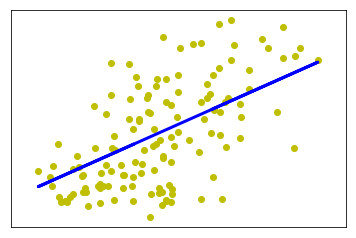

In [112]:
# Plot outputs
#plt.scatter(train_x, train_y,  color='black')
plt.scatter(test_x, test_y,  color='y')

plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


### KNN regression 

In [113]:
from sklearn.neighbors import KNeighborsRegressor

In [145]:
knn_reg = KNeighborsRegressor(n_neighbors=25)

knn_reg.fit(train_x, train_y)
y_pred_knn = knn_reg.predict(test_x)



In [146]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_reg, train_x, train_y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

Accuracy: 0.27 (+/- 0.18)


In [147]:
from sklearn.metrics import r2_score, mean_squared_error

print("Mean squared error :  %.2f"
      % mean_squared_error(test_y, y_pred_knn))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred_knn))


Mean squared error :  4050.82
Variance score: 0.30


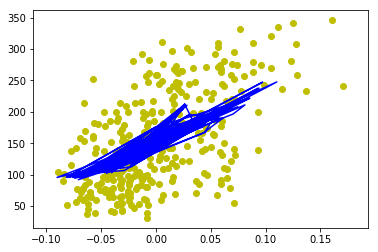

In [148]:
# plots 

plt.scatter(train_x, train_y, c='y')
plt.plot(test_x, y_pred_knn, c= 'b', label='prediction')


In [157]:
k_value = []
for k in np.arange(1,31): 
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    score = (cross_val_score(knn_reg, train_x, train_y, cv=10)).mean()
    k_value.append(score)


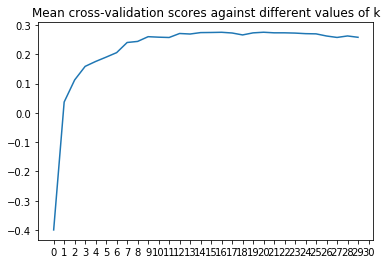

In [159]:
plt.plot(k_value)
plt.title("Mean cross-validation scores against different values of k")
plt.xticks(np.arange(31))
plt.show()

__Results:__

Linear regression seems to be working better thant the KNN regression. 